# **Context**

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4, and P5). After intensive market research, they’ve deduced that the behavior of the new market is similar to their existing market.


In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has work e exceptionally well for them. They plan to use the same strategy for the new markets and have identified 2627 new potential customers.


You are required to help the manager to predict the right group of the new customers.


# **Content**
* Variable	- Definition
* ID	- Unique ID
* Gender	- Gender of the customer
* Ever_Married - 	Marital status of the customer
* Age	- Age of the customer
* Graduated -	Is the customer a graduate?
* Profession -	Profession of the customer
* Work_Experience -	Work Experience in years
* Spending_Score	- Spending score of the customer
* Family_Size	- Number of family members for the customer (including the customer)
* Var_1 -	Anonymised Category for the customer
* Segmentation -	(target) Customer Segment of the customer

Acknowledgements
This dataset was acquired from the Analytics Vidhya hackathon.

In [1]:
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler
from plotly.offline import init_notebook_mode,iplot

# **Training Data**

In [2]:
df_train = pd.read_csv('../input/customer-segmentation/Train.csv')
df_train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


# **Clearing the Data**

In [3]:
df_train.isna().sum(axis=0)

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

There is a lot of null data in the training base, if we delete it it will decrease the database a lot.

If it was a company and we had contact with the database supplier, we would try to fill in the missing data.

In order not to lag the database too much, let's fill in the average of each missing value.

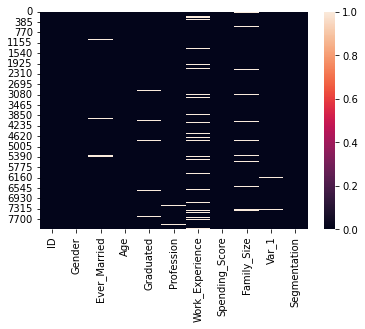

In [4]:
sns.heatmap(df_train.isnull());

In [5]:
df_train.fillna(df_train.mean(), inplace = True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



There are some categorical data that could not be filled with the mean value, so we will delete them, so we try to delete as little as possible in order to keep the database.

In [6]:
df_train.dropna(axis=0, inplace=True)

In [7]:
df_train.isna().sum(axis=0)

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [8]:
df_train = df_train.drop(columns=["ID"]) 

# **Exploring the Data**

In [9]:
temp = df_train.describe()
temp.style.background_gradient(cmap='Oranges')

,Age,Work_Experience,Family_Size
count,7669.000000,7669.000000,7669.000000
mean,43.508541,2.636749,2.847449
std,16.689330,3.234815,1.498570
min,18.000000,0.000000,1.000000
25%,31.000000,0.000000,2.000000
50%,40.000000,1.000000,2.850123
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [10]:
g1 = [go.Box(y=df_train.Work_Experience,name="Work_Experience",marker=dict(color="rgba(51,0,0,0.9)"),hoverinfo="name+y")]
g2 = [go.Box(y=df_train.Family_Size,name="Family_Size",marker=dict(color="rgba(0,102,102,0.9)"),hoverinfo="name+y")]
layout2 = go.Layout(title="Work Experience | Family Size",yaxis=dict(range=[0,13])) 
fig2 = go.Figure(data=g1+g2,layout=layout2)
iplot(fig2)

In [11]:
grafico = px.box(df_train, y='Age')
grafico.show()

In [12]:
fig2 = px.histogram(df_train,x='Age',color='Age',template='plotly_dark')
fig2.show()

In [13]:
fig2 = px.histogram(df_train,x='Gender',color='Gender',template='plotly_dark')
fig2.show()

In [14]:
fig2 = px.histogram(df_train,x='Ever_Married',color='Ever_Married',template='plotly_dark')
fig2.show()

In [15]:
fig2 = px.histogram(df_train,x='Graduated',color='Graduated',template='plotly_dark')
fig2.show()

In [16]:
fig2 = px.histogram(df_train,x='Profession',color='Profession',template='plotly_dark')
fig2.show()

In [17]:
fig2 = px.histogram(df_train,x='Work_Experience',color='Work_Experience',template='plotly_dark')
fig2.show()

In [18]:
fig2 = px.histogram(df_train,x='Spending_Score',color='Spending_Score',template='plotly_dark')
fig2.show()

In [19]:
fig2 = px.histogram(df_train,x='Family_Size',color='Family_Size',template='plotly_dark')
fig2.show()

In [20]:
fig2 = px.histogram(df_train,x='Var_1',color='Var_1',template='plotly_dark')
fig2.show()

**Through the graphics it was possible to analyze all the columns and have details of each one of them.**

# **Processing**

In [21]:
mk = LabelEncoder()
df_train['Gender'] = mk.fit_transform(df_train['Gender'])
df_train['Ever_Married'] = mk.fit_transform(df_train['Ever_Married'])
df_train['Graduated'] = mk.fit_transform(df_train['Graduated'])
df_train['Spending_Score'] = mk.fit_transform(df_train['Spending_Score'])
df_train['Var_1'] = mk.fit_transform(df_train['Var_1'])
df_train['Profession'] = mk.fit_transform(df_train['Profession'])
df_train['Family_Size'] = mk.fit_transform(df_train['Family_Size'])
df_train['Work_Experience'] = mk.fit_transform(df_train['Work_Experience'])
df_train['Segmentation'] = mk.fit_transform(df_train['Segmentation'])

In [22]:
df_train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1,2,4,3,3
1,0,1,38,1,2,3,0,3,3,0
2,0,1,67,1,2,1,2,0,5,1
3,1,1,67,1,7,0,1,1,5,1
4,0,1,40,1,3,3,1,6,5,0
...,...,...,...,...,...,...,...,...,...,...
8062,1,1,41,1,0,0,1,5,5,1
8064,1,0,35,0,4,4,2,4,3,3
8065,0,0,33,1,5,1,2,0,5,3
8066,0,0,27,1,5,1,2,4,5,1


In [23]:
scaler = StandardScaler()                                         
df_scaled = scaler.fit_transform(df_train)

In [24]:
type(df_scaled)

numpy.ndarray

In [25]:
min(df_scaled[0]), max(df_scaled[0]) 

(-1.2981618118077016, 1.2700839549557774)

In [26]:
df_scaled

array([[ 0.90476042, -1.18908053, -1.28884403, ...,  0.86957817,
        -0.817195  ,  1.27008395],
       [-1.10526497,  0.84098594, -0.33008515, ...,  0.34698629,
        -0.817195  , -1.37313826],
       [-1.10526497,  0.84098594,  1.40766531, ..., -1.22078935,
         0.59414797, -0.49206419],
       ...,
       [-1.10526497, -1.18908053, -0.6296973 , ..., -1.22078935,
         0.59414797,  1.27008395],
       [-1.10526497, -1.18908053, -0.98923188, ...,  0.86957817,
         0.59414797, -0.49206419],
       [ 0.90476042,  0.84098594, -0.39000758, ...,  0.34698629,
        -0.817195  , -0.49206419]])

In [27]:
wcss_1 = []                                     
range_values = range(1, 10)                    
for i in range_values:                        
  kmeans = KMeans(n_clusters=i)                 
  kmeans.fit(df_scaled)            
  wcss_1.append(kmeans.inertia_)  

In [28]:
print(wcss_1) 

[76689.99999999985, 62222.14475408183, 55626.16377692387, 50084.41790959026, 47120.18703333263, 44669.87428669634, 42795.6148231291, 40806.53643854447, 39569.67892732104]


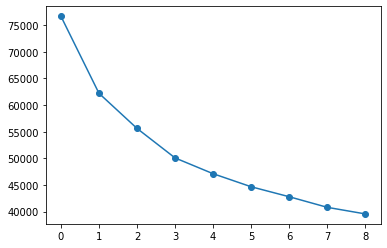

In [29]:
grafico = px.line(x = range(1,10), y = wcss_1)
plt.plot(wcss_1, '-o',)  
grafico.show()

In [30]:
kmeans = KMeans(n_clusters=5)           
kmeans.fit(df_scaled)         
labels = kmeans.labels_

In [31]:
labels, len(labels)  

(array([0, 3, 2, ..., 0, 0, 3], dtype=int32), 7669)

In [32]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([1784,  999, 1645, 2277,  964]))

In [33]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_train.columns])
cluster_centers

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0.027064,-1.058219,-0.987788,-0.797274,0.623577,-0.210411,0.727140,0.740688,-0.293084,0.906592
1,-0.246125,-0.362016,-0.391567,0.265105,-0.094245,1.858051,0.495613,-0.450241,0.190100,-0.092538
2,-0.105751,-0.241305,-0.017396,0.401891,-0.607003,-0.440855,0.737864,-0.583831,-0.026157,-0.668815
3,0.093155,0.840986,0.233570,0.266832,-0.540253,-0.147615,-1.346278,0.274200,0.018387,-0.115014
4,0.165321,0.758942,1.710258,-0.114947,1.253705,-0.434862,0.060111,-0.554688,0.346249,-0.168852


In [34]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_train.columns])
cluster_centers

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0.563341,0.064462,27.024103,0.242152,4.352018,2.191143,1.978139,3.753363,3.742713,2.587444
1,0.427427,0.407407,36.973974,0.755756,2.532533,9.701702,1.781782,1.474474,4.427427,1.453453
2,0.497264,0.466869,43.218237,0.821884,1.232827,1.354407,1.987234,1.218845,4.120973,0.799392
3,0.596221,1.000000,47.406415,0.756591,1.402021,2.419156,0.219684,2.860721,4.184095,1.427944
4,0.632124,0.959585,72.049741,0.572021,5.949223,1.376166,1.412435,1.274611,4.648705,1.366839


In [35]:
df_mk_cluster = pd.concat([df_train, pd.DataFrame({'cluster': labels})], axis = 1) 
df_mk_cluster.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,cluster
0,1.0,0.0,22.0,0.0,5.0,1.0,2.0,4.0,3.0,3.0,0.0
1,0.0,1.0,38.0,1.0,2.0,3.0,0.0,3.0,3.0,0.0,3.0
2,0.0,1.0,67.0,1.0,2.0,1.0,2.0,0.0,5.0,1.0,2.0
3,1.0,1.0,67.0,1.0,7.0,0.0,1.0,1.0,5.0,1.0,4.0
4,0.0,1.0,40.0,1.0,3.0,3.0,1.0,6.0,5.0,0.0,3.0


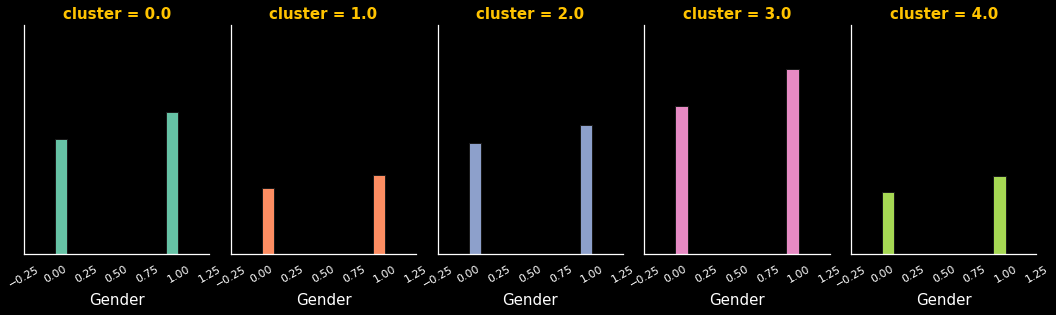

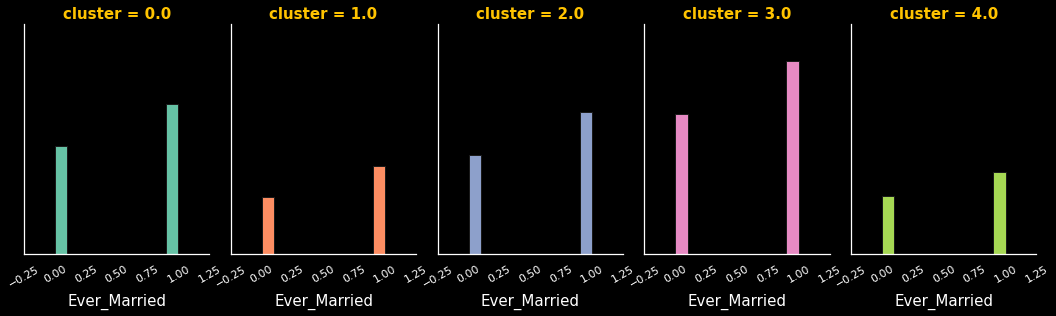

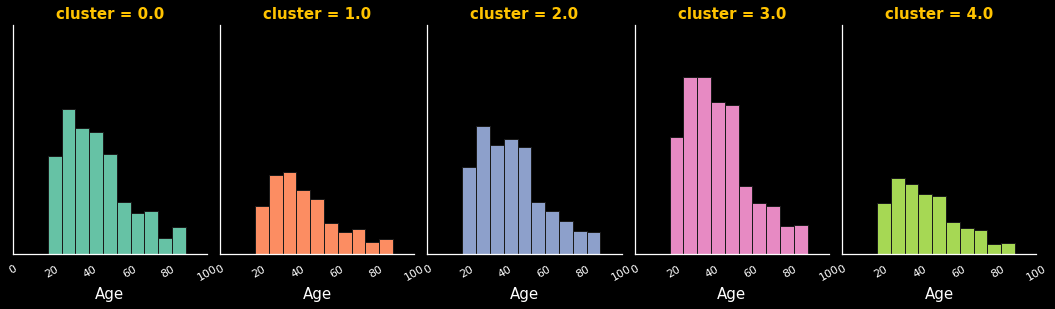

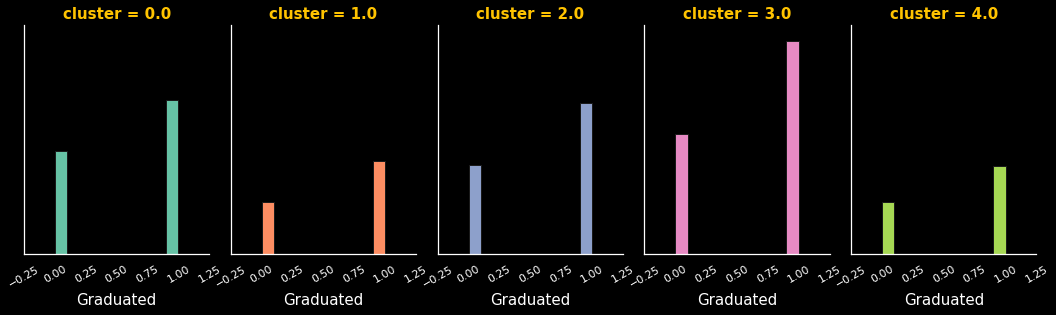

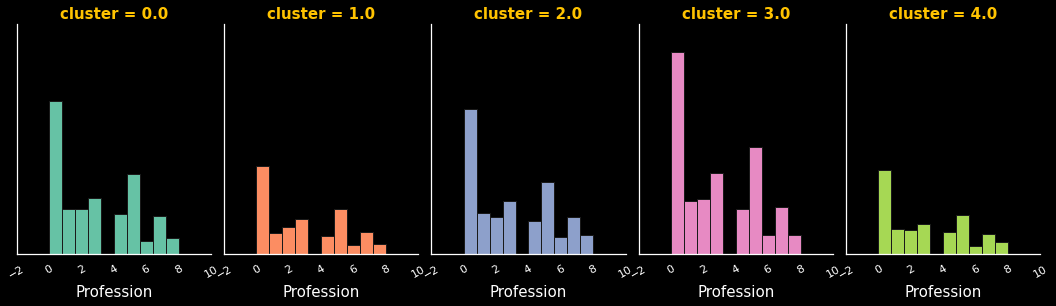

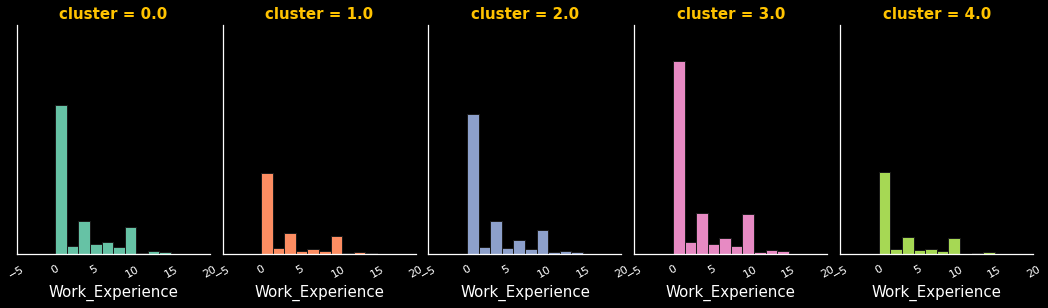

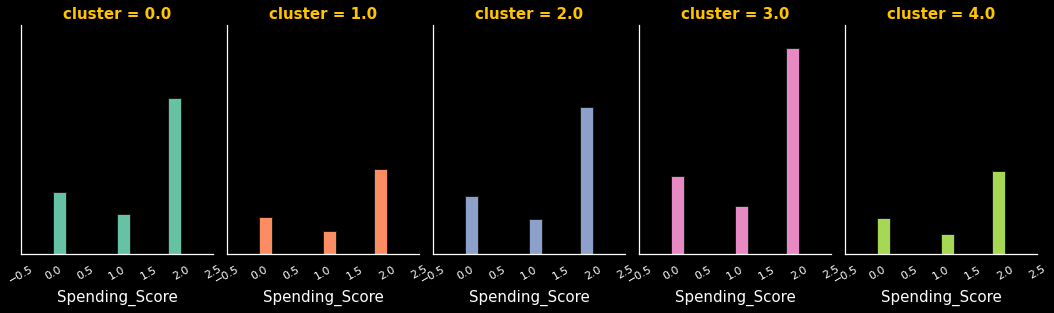

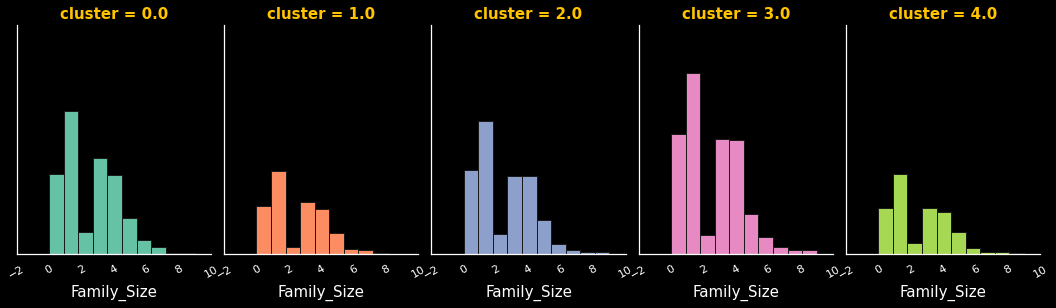

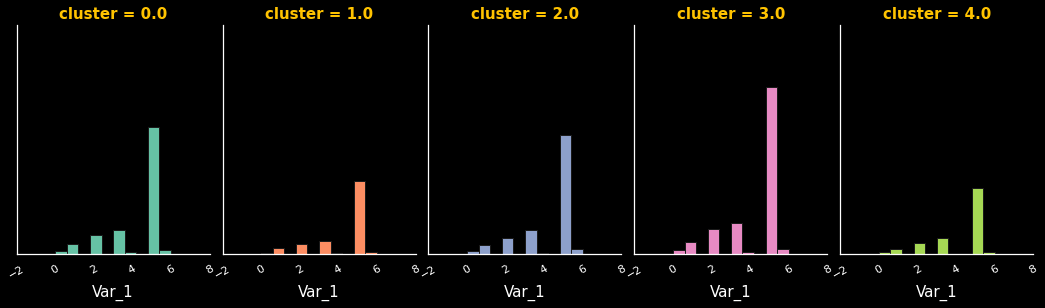

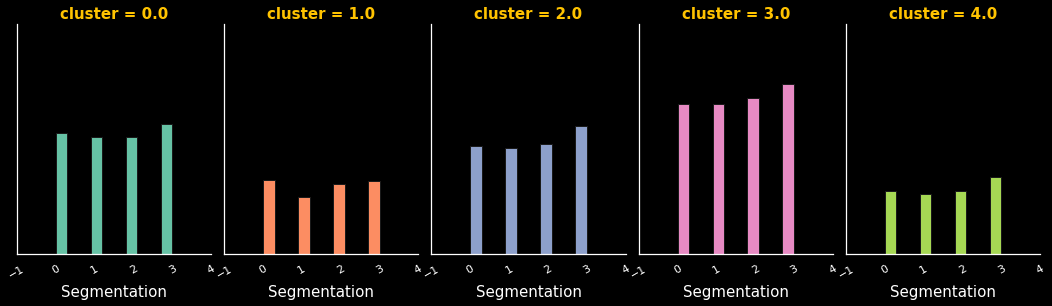

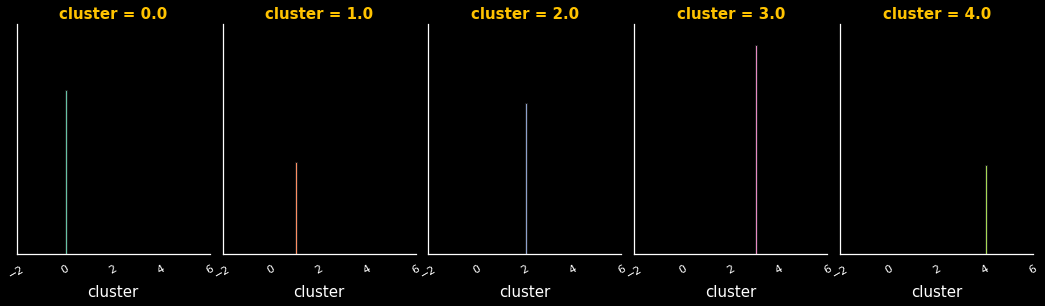

In [36]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False, 'font.family': 'Ubuntu'})

for i in df_mk_cluster:
    g = sns.FacetGrid(df_mk_cluster, col = "cluster", hue = "cluster", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30, color = 'white')
    g.set_yticklabels(color = 'white')
    g.set_xlabels(size=15, color = 'white')
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5);

In [37]:
import matplotlib as mpl

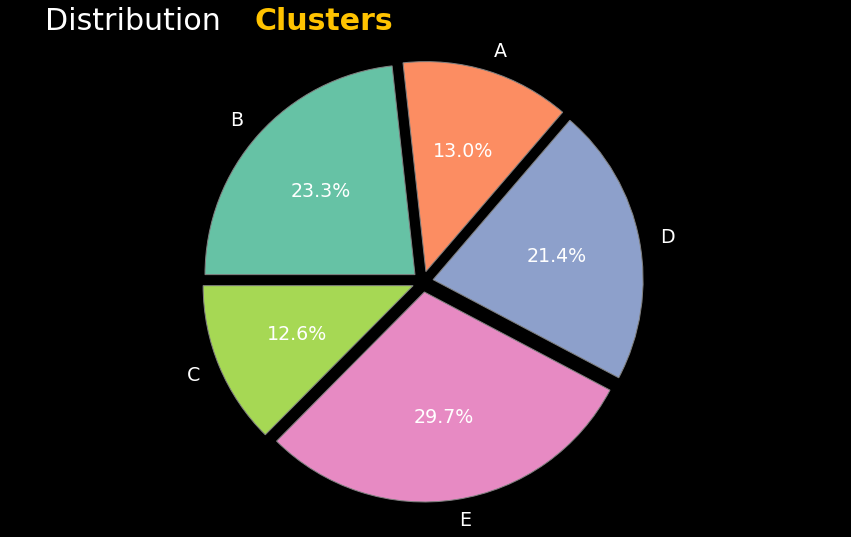

In [38]:
clusters_count = df_mk_cluster['cluster'].value_counts()                       
clusters_count = clusters_count.to_frame().reset_index()                      
clusters_count.columns = ['clusters', 'count']                               
clusters_count = clusters_count.sort_values('clusters', ascending = True)     

labels = [
        "B", 
        "A", 
        "D", 
        "E",
        "C"
        ]

plt.figure(figsize=(15,9))
mpl.rcParams['font.size'] = 17
colors = sns.color_palette('Set2')[0:5]
plt.pie(clusters_count['count'], 
        explode=(0.05, 0.05, 0.05, 0.05, 0.05), 
        labels = labels,
        colors= colors,
        autopct='%1.1f%%',
        textprops = dict(color ="white", fontsize=19),
        counterclock = False,
        startangle=180,
        wedgeprops={"edgecolor":"gray",'linewidth':1}
        )

plt.axis('equal')
plt.text(-0.8, 1.2, "Clusters", size=30, color="#FFC300", fontweight="bold")
plt.text(-1.8, 1.2, "Distribution", size=30, color="white")
plt.show();

# **Hierarchical Grouping**

In [39]:
df_scaled

array([[ 0.90476042, -1.18908053, -1.28884403, ...,  0.86957817,
        -0.817195  ,  1.27008395],
       [-1.10526497,  0.84098594, -0.33008515, ...,  0.34698629,
        -0.817195  , -1.37313826],
       [-1.10526497,  0.84098594,  1.40766531, ..., -1.22078935,
         0.59414797, -0.49206419],
       ...,
       [-1.10526497, -1.18908053, -0.6296973 , ..., -1.22078935,
         0.59414797,  1.27008395],
       [-1.10526497, -1.18908053, -0.98923188, ...,  0.86957817,
         0.59414797, -0.49206419],
       [ 0.90476042,  0.84098594, -0.39000758, ...,  0.34698629,
        -0.817195  , -0.49206419]])

In [40]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

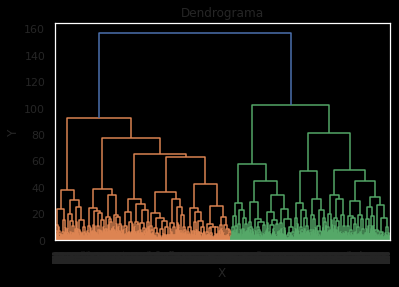

In [41]:
dendrograma = dendrogram(linkage(df_scaled, method='ward'))
plt.title('Dendrograma')
plt.xlabel('X')
plt.ylabel('Y');

In [42]:
from sklearn.cluster import AgglomerativeClustering

In [43]:
hc_g = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage = 'ward')
rotulos = hc_g.fit_predict(df_scaled)

In [44]:
rotulos

array([2, 0, 0, ..., 1, 1, 0])

In [45]:
grafico = px.scatter(x = df_scaled[:,0], y = df_scaled[:,1], color = rotulos)
grafico.show()

# **DBSCAN**

In [46]:
df_scaled

array([[ 0.90476042, -1.18908053, -1.28884403, ...,  0.86957817,
        -0.817195  ,  1.27008395],
       [-1.10526497,  0.84098594, -0.33008515, ...,  0.34698629,
        -0.817195  , -1.37313826],
       [-1.10526497,  0.84098594,  1.40766531, ..., -1.22078935,
         0.59414797, -0.49206419],
       ...,
       [-1.10526497, -1.18908053, -0.6296973 , ..., -1.22078935,
         0.59414797,  1.27008395],
       [-1.10526497, -1.18908053, -0.98923188, ...,  0.86957817,
         0.59414797, -0.49206419],
       [ 0.90476042,  0.84098594, -0.39000758, ...,  0.34698629,
        -0.817195  , -0.49206419]])

In [47]:
from sklearn.cluster import DBSCAN

In [48]:
dbscan_g = DBSCAN(eps = 0.95, min_samples=2)
dbscan_g.fit(df_train)

DBSCAN(eps=0.95, min_samples=2)

In [49]:
rotulos = dbscan_g.labels_
rotulos

array([  0,  -1,  -1, ..., 169,  -1,  -1])

In [50]:
grafico = px.scatter(x = df_scaled[:,0], y = df_scaled[:,1], color = rotulos)
grafico.show()

# **K-means x Hierarchical x DBSCAN**

In [51]:
from sklearn import datasets

In [52]:
X_random, y_random = datasets.make_moons(n_samples=1500, noise = 0.09)

In [53]:
X_random

array([[ 0.76524041,  0.80794194],
       [-0.84925404,  0.82924638],
       [ 1.61207787, -0.37024856],
       ...,
       [ 0.23761454,  0.99425322],
       [-0.23869092,  1.0969381 ],
       [ 1.99966301,  0.06979026]])

# Data Visualization

In [54]:
grafico = px.scatter(x = X_random[:,0], y = X_random[:,1])
grafico.show()

#  KMeans

In [55]:
kmeans = KMeans(n_clusters=2)
rotulos = kmeans.fit_predict(X_random)
grafico = px.scatter(x = X_random[:,0], y = X_random[:, 1], color = rotulos)
grafico.show()

**As we can see Kmena was not able to do an efficient separation of the data, it would not be efficient for sorting this data;**

# Agglomerative Clustering

In [56]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
rotulos = hc.fit_predict(X_random)
grafico = px.scatter(x = X_random[:,0], y = X_random[:, 1], color = rotulos)
grafico.show()

**It wasn't very efficient in the separation either.**

# DBSCAN

In [57]:
dbscan = DBSCAN(eps=0.1)
rotulos = dbscan.fit_predict(X_random)
grafico = px.scatter(x = X_random[:,0], y = X_random[:, 1], color = rotulos)
grafico.show()

There are some groups that he could not associate, which are dark blue in color;

We can verify that the DBDCAN algorithm did better in the grouping, we defined the radio 0.1, which helps a lot in the separation;

We have a small database however, we could use the two previous more traditional algorithms for the type of study in this database,

In general DBDCAN presents better results than k-means and also faster, what improves the algorithm a lot is the threshold distance, it ends up being more interesting when we have more complex problems and with a much larger database.


# **If you find this notebook useful, support with an upvote** 👍